In [8]:
#线性分类
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
# print(iris)
x = iris['data'][:,2:4]
y = (iris['target']==2).astype(np.float64)
svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_svc',LinearSVC(C=1,loss='hinge'))
])
svm_clf.fit(x,y)
svm_clf.predict([[5.5,1.7],[1.3,1.2]])

array([1., 0.])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


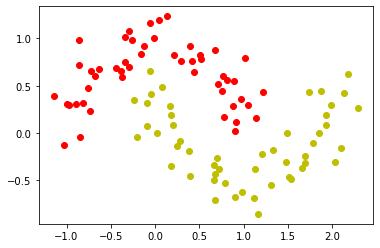

In [9]:
#非线性分类
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x,y = make_moons(n_samples=100,noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
])
polynomial_svm_clf.fit(x,y)
a=[]
for i in range(len(y)):
    if y[i]==1:
        a.append(i)
x1 = np.array([x[i] for i in range(100) if i not in a])
x2 = np.array([x[i] for i in range(100) if i in a])
plt.scatter(x1[:,0],x1[:,1],c='r')
plt.scatter(x2[:,0],x2[:,1],c='y')
plt.show()

In [10]:
#三阶多项式内核
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='poly',degree=3,C=5))
])
poly_kernel_svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, kernel='poly'))])

In [11]:
#高斯RBF内核
rbf_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='rbf',gamma=5,C=0.001))
])
rbf_kernel_svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [12]:
#SVM回归_线性回归
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(x,y)

LinearSVR(epsilon=1.5)

In [13]:
#二阶多项式核SVM回归
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel='poly',degree=2,C=100,epsilon=0.1)
svm_poly_reg.fit(x,y)

SVR(C=100, degree=2, kernel='poly')

In [ ]:
#SVM人脸数据识别
from sklearn.datasets import fetch_lfw_people
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
lfw_people=fetch_lfw_people(min_faces_per_person=100,resize=0.4)
# print(lfw_people.images[0].shape)
n,h,w = lfw_people.images.shape
print(n,h,w)
x = lfw_people.data
y = lfw_people.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_svc',LinearSVC(C=0.5,loss='hinge'))
])
svm_clf.fit(x_train,y_train)
print('线性分类得分：',svm_clf.score(x_test,y_test))

a = np.reshape(x[0],(h,w))
# plt.plot(a)
# plt.show()
plt.imshow(a)
plt.show()
# polynomial_svm_clf = Pipeline([
#     ('poly_features',PolynomialFeatures(degree=3)),
#     ('scaler',StandardScaler()),
#     ('svm_clf',LinearSVC(C=10,loss='hinge'))
# ])
# polynomial_svm_clf.fit(x_train,y_train)
# print('非线性分类得分：',polynomial_svm_clf.score(x_test,y_test))

# poly_kernel_svm_clf = Pipeline([
#     ('scaler',StandardScaler()),
#     ('svm_clf',SVC(kernel='poly',degree=1,C=3))
# ])
# poly_kernel_svm_clf.fit(x_train,y_train)
# print('多项式内核得分：',poly_kernel_svm_clf.score(x_test,y_test))


In [ ]:
#SVM新闻主题分类 
import pandas as pd 
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import jieba

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris=load_iris()
iris_feature=iris.data
iris_target=iris.target
x_train, x_test, y_train, y_test = train_test_split(iris_feature, iris_target, test_size=0.3, random_state=42)

classfier = MultinomialNB()
classfier.fit(x_train,y_train)
print('样本数据量：',len(iris_target))
print('朴素贝叶斯模型得分：',classfier.score(x_test,y_test))

样本数据量： 150
朴素贝叶斯模型得分： 0.9555555555555556
